In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [5]:
print("=" * 60)
print("SIMPLE NAIVE BAYES CLASSIFIER - IRIS DATASET")
print("=" * 60)

# 1. LOAD AND EXPLORE THE DATASET
print("\n1. LOADING IRIS DATASET")
print("-" * 30)

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]

print(f"Dataset shape: {X.shape}")
print(f"Features: {feature_names}")
print(f"Classes: {target_names}")
print(f"Samples per class: {np.bincount(y)}")

SIMPLE NAIVE BAYES CLASSIFIER - IRIS DATASET

1. LOADING IRIS DATASET
------------------------------
Dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Samples per class: [50 50 50]


In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


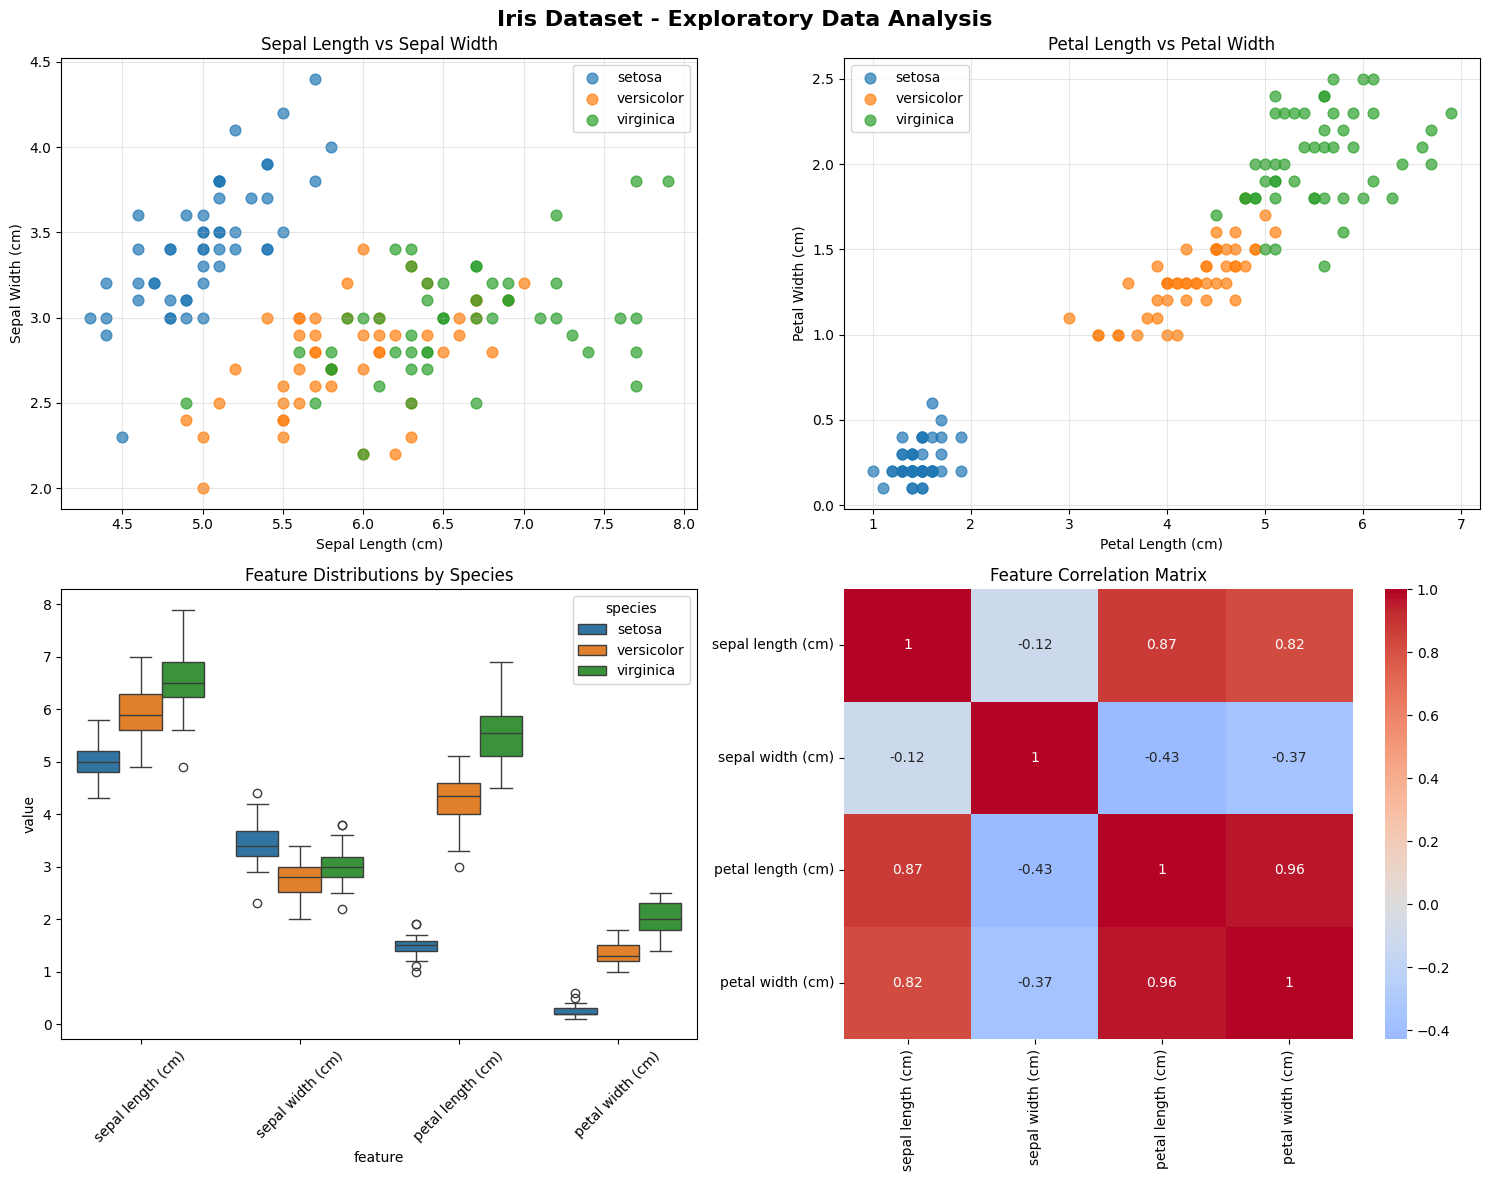

In [9]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Iris Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Plot 1: Pairplot-style scatter for first two features
for i, species in enumerate(target_names):
    mask = df['species'] == species
    axes[0, 0].scatter(df[mask]['sepal length (cm)'], 
                      df[mask]['sepal width (cm)'], 
                      label=species, alpha=0.7, s=60)
axes[0, 0].set_xlabel('Sepal Length (cm)')
axes[0, 0].set_ylabel('Sepal Width (cm)')
axes[0, 0].set_title('Sepal Length vs Sepal Width')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Petal measurements
for i, species in enumerate(target_names):
    mask = df['species'] == species
    axes[0, 1].scatter(df[mask]['petal length (cm)'], 
                      df[mask]['petal width (cm)'], 
                      label=species, alpha=0.7, s=60)
axes[0, 1].set_xlabel('Petal Length (cm)')
axes[0, 1].set_ylabel('Petal Width (cm)')
axes[0, 1].set_title('Petal Length vs Petal Width')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Feature distributions
df_melted = df.melt(id_vars=['species'], var_name='feature', value_name='value')
sns.boxplot(data=df_melted, x='feature', y='value', hue='species', ax=axes[1, 0])
axes[1, 0].set_title('Feature Distributions by Species')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Correlation heatmap
correlation_matrix = df.iloc[:, :-1].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()


In [10]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Testing class distribution: {np.bincount(y_test)}")

# Create and train the Naive Bayes classifier
# Using GaussianNB (assumes features follow normal distribution)
nb_classifier = GaussianNB()

print("Training Naive Bayes classifier...")
nb_classifier.fit(X_train, y_train)

# Make predictions
print("Making predictions on test set...")
y_pred = nb_classifier.predict(X_test)

# Get prediction probabilities
y_pred_proba = nb_classifier.predict_proba(X_test)

print("Training completed successfully!")


Training set size: 105 samples
Testing set size: 45 samples
Training class distribution: [35 35 35]
Testing class distribution: [15 15 15]
Training Naive Bayes classifier...
Making predictions on test set...
Training completed successfully!


In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Accuracy: 0.9111 (91.11%)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


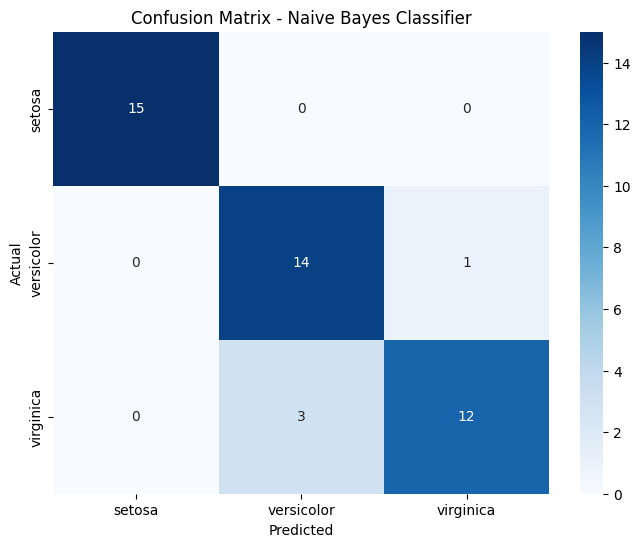

In [15]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()